### Load dataset

In [ ]:
!gdown 'https://drive.google.com/uc?id=14mBrb2eUk4PTi_2UaoNshMLyvBCwOiPR' -O /content/folio.zip
!unzip /content/folio.zip -d /content

In [65]:
cd /content/folio/folio

/content/folio/folio


In [66]:
# from os import listdir
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [67]:
import os

In [68]:
FJoin = os.path.join
folder_name = [FJoin('/content/folio/folio/', f) for f in os.listdir('/content/folio/folio/')]

In [69]:
folder_name

['/content/folio/folio/barbados cherry',
 '/content/folio/folio/ashanti blood',
 '/content/folio/folio/caricature plant',
 '/content/folio/folio/bitter orange',
 '/content/folio/folio/coeur demoiselle',
 '/content/folio/folio/mulberry leaf',
 '/content/folio/folio/coffee',
 '/content/folio/folio/betel',
 '/content/folio/folio/jackfruit',
 '/content/folio/folio/croton']

In [70]:
X = []
y = []

In [71]:
eta = 0.1 #scale image
count = 1
for i in folder_name:   
  file_name = [FJoin(i, f) for f in os.listdir(i)]
  for j in file_name:
    img = cv2.imread(j, 0)    
    img = cv2.resize(img, (int(img.shape[0] * eta), int(img.shape[1] * eta)))
    X.append(img)
    y.append(count)
    
  count = count + 1


In [72]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [73]:
print(X.shape)
print(y.shape)

(199, 232, 412)
(199, 1)


In [74]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

## Phương pháp duỗi thẳng ảnh thành vector

### Preprocessing

In [77]:
X1dtrain = Xtrain.reshape(-1, 232 * 412)
X1dtest = Xtest.reshape(-1, 232 * 412)

### Train model

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)

In [79]:
model.fit(X1dtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [80]:
yPre = model.predict(X1dtest)

In [81]:
yPre

array([ 5,  3,  7,  4,  7,  5,  8,  8,  3,  7,  6,  9,  7,  2,  6,  3,  2,
       10,  1, 10,  2,  8,  9,  5,  3,  4,  4,  3, 10,  3,  6,  2,  8,  8,
       10,  9,  4,  4,  9,  9,  4,  1, 10,  1, 10,  8,  5,  6,  1,  8,  9,
        3,  7,  6,  8,  3,  9,  2,  3,  6])

### Evaluate

In [82]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate(ytest, predict):
  acc = accuracy_score(ytest, predict, normalize=True)
  preci = precision_score(ytest, predict, average='macro')
  recall = recall_score(ytest, predict, average='macro')
  f1 = f1_score(ytest, predict, average='macro')

  print('Accuracy: {}%'.format(round(acc * 100, 2)))
  print('Precision: {}%'.format(round(preci * 100, 2)))
  print('Recall: {}%'.format(round(recall * 100, 2)))
  print('F_1: {}%'.format(round(f1 * 100, 2)));
  return [acc, preci, recall, f1]

In [83]:
eval_1d = evaluate(ytest, yPre)

Accuracy: 91.67%
Precision: 92.21%
Recall: 92.46%
F_1: 91.58%


## Phuong phap sử dụng H.O.G

### Preprocessing data

In [84]:
from skimage.feature import hog

In [85]:
def calculate_hog (image):
  return hog(image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), block_norm='L2')

In [86]:
 X_hog_train = []
 X_hog_test = []

In [87]:
for x in Xtrain:
  X_hog_train.append(calculate_hog(x))

In [88]:
for x in Xtest:
  X_hog_test.append(calculate_hog(x))

In [89]:
X_hog_train = np.array(X_hog_train)
X_hog_test = np.array(X_hog_test)

### Train model

In [90]:
clf = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)

In [91]:
print(X_hog_test.shape)

(60, 209304)


In [92]:
clf.fit(X_hog_train, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [93]:
yhogpred = clf.predict(X_hog_test)

### Evaluate

In [94]:
eval_hog = evaluate(ytest, yhogpred)

Accuracy: 88.33%
Precision: 91.07%
Recall: 88.57%
F_1: 87.03%


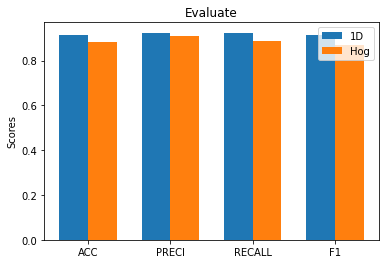

In [95]:
ind = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, eval_1d, width,
                label='1D')
rects2 = ax.bar(ind + width/2, eval_hog, width,
                label='Hog')


ax.set_ylabel('Scores')
ax.set_title('Evaluate')
ax.set_xticks(ind)
ax.set_xticklabels(('ACC', 'PRECI', 'RECALL', 'F1'))
ax.legend()

plt.show()